# Pandas 패키지
- 데이터를 분석하기 위한 패키지입니다
- excel과 유사한 기능을 한다고 생각하면 됩니다

In [1]:
# 패키지를 사용하려면 그 패키지를 임포트(import)해야 합니다
# pandas 패키지를 작업 중인 코드에 불러옵니다
# 아래 코드는 pandas 패키지를 pd라는 이름으로 불러오는 코드입니다
import pandas as pd 

# Pandas의 자료 구조
- Series: 1차원 배열 형태의 자료 구조 (행만 있음)
- DataFrame: 2차원 배열 형태의 자료 구조 (행과 열이 있음, 엑셀과 유사)
- index열이 추가되는데, 이 index를 통해 딕셔너리와 유사하게 자료에 접근할 수 있습니다.

# Series

In [2]:
mslp = [1011, 996, 1023, 986]
series = pd.Series(mslp)      # 가지고 있는 자료를 pandas series 객체로 만드는 명령
series

0    1011
1     996
2    1023
3     986
dtype: int64

In [3]:
# 인덱스 추가
station = ['Seoul','Ulleungdo','Beijing','Tokyo']
series = pd.Series(mslp, index=station)
print(series)
print(series['Seoul'])

Seoul        1011
Ulleungdo     996
Beijing      1023
Tokyo         986
dtype: int64
1011


In [4]:
# 누락된 자료
mslp = {'Seoul':1011, 'Ulleungdo':996, 'Beijing':1023, 'Tokyo':986}
station = ['Seoul','Ulleungdo','Beijing','Tokyo','Busan']
series = pd.Series(mslp, index=station)
print(series) # Busan의 자료가 없어 NaN이라고 나타남
print(series.isnull()) # 자료의 누락 여부를 행별로 나타내는 명령

Seoul        1011.0
Ulleungdo     996.0
Beijing      1023.0
Tokyo         986.0
Busan           NaN
dtype: float64
Seoul        False
Ulleungdo    False
Beijing      False
Tokyo        False
Busan         True
dtype: bool


In [5]:
# Series 객체 간의 연산
# index 끼리
today_mslp = series
tomorrow_mslp = pd.Series({'Seoul':1014, 'Ulleungdo':998, 'Tokyo':990, 'Busan':1000})
print((today_mslp + tomorrow_mslp) / 2.)
# 자료의 누락이 없는 인덱스에 대해서만 연산이 수행되고, 나머지는 누락으로 처리됨을 알 수 있음

Beijing         NaN
Busan           NaN
Seoul        1012.5
Tokyo         988.0
Ulleungdo     997.0
dtype: float64


# DataFrame

In [6]:
# Station
data = {'mslp':[1011,996,1023,986,994], 'temp':[24.1,23.2,25.4,21.4,22.0], 'station':station}
weather = pd.DataFrame(data)
print(weather)

   mslp  temp    station
0  1011  24.1      Seoul
1   996  23.2  Ulleungdo
2  1023  25.4    Beijing
3   986  21.4      Tokyo
4   994  22.0      Busan


좀더 자세한 내용은 https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html 참조

In [7]:
# Time series
import datetime
t1 = datetime.datetime(2021,9,17,10)
t2 = datetime.datetime(2021,9,18,10)
td = t2 - t1
print(t1, t2, td)

time = [datetime.datetime(2021,9,16,2*i) for i in range(12)]
temp = [22,21,20,21,23,25,26,28,27,26,24,23]
relh = [70,75,75,80,75,70,60,55,50,50,55,65]
data = {'temperature':temp, 'relative_humidity':relh}
time_series = pd.DataFrame(data, index=time)
print(time_series)

2021-09-17 10:00:00 2021-09-18 10:00:00 1 day, 0:00:00
                     temperature  relative_humidity
2021-09-16 00:00:00           22                 70
2021-09-16 02:00:00           21                 75
2021-09-16 04:00:00           20                 75
2021-09-16 06:00:00           21                 80
2021-09-16 08:00:00           23                 75
2021-09-16 10:00:00           25                 70
2021-09-16 12:00:00           26                 60
2021-09-16 14:00:00           28                 55
2021-09-16 16:00:00           27                 50
2021-09-16 18:00:00           26                 50
2021-09-16 20:00:00           24                 55
2021-09-16 22:00:00           23                 65


# 관측소 시간 자료 받아서 읽기
 - 기상자료개방포털 data.kma.go.kr (회원가입 필요)
 -  데이터 > 기상관측 > 지상 > 종관기상관측(ASOS)
 - 자료형태: 시간, 기간과 지점 선택


In [15]:
# READ the CSV file
import os
path = 'C:\\Users\\DongGyu_Hyeon\\Downloads'  # 파일의 위치
fname = 'OBS_ASOS_TIM_20210916210208.csv'     # 파일의 이름
fpath = os.path.join(path,fname)
print(fpath)

df = pd.read_csv(fpath, encoding='euc_kr')
print(df.keys())
print(df.head())

C:\Users\DongGyu_Hyeon\Downloads\OBS_ASOS_TIM_20210916210208.csv
Index(['지점', '지점명', '일시', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그',
       '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)',
       '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)',
       '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )',
       '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그',
       '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')
    지점 지점명                일시  기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그  풍속(m/s)  \
0  108  서울  2021-09-15 00:00    22.2       NaN      NaN        NaN      4.6   
1  108  서울  2021-09-15 01:00    21.5       NaN      NaN        NaN      3.2   
2  108  서울  2021-09-15 02:00    21.1       NaN      NaN        NaN      2.9   
3  108  서울  2021-09-15 03:00    20.9       NaN      NaN        NaN      3.1 

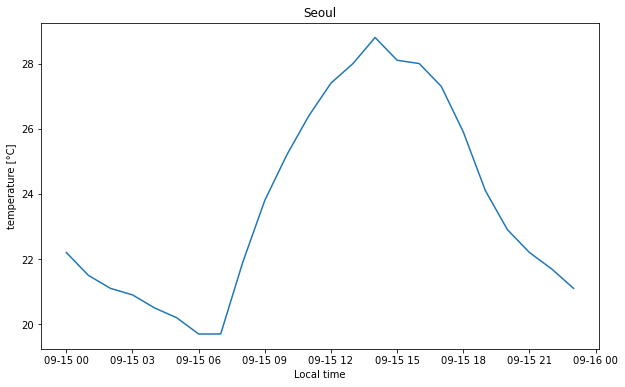

In [20]:
import matplotlib.pyplot as plt
df = pd.read_csv(fpath, encoding='euc_kr')
df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d %H:00')
df = df.set_index('일시')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['기온(°C)'])
ax.set_xlabel('Local time')
ax.set_ylabel('temperature [°C]')
ax.set_title('Seoul')
plt.show()

# 연습문제
- 기상자료개방포털에서 원하는 지점의 어제 시간 자료를 내려받기
- pandas로 이를 읽기
- pyplot으로 시간에 따른 기온과 해면기압의 변화를 그리기
- 한 그림 안에 기온과 해면기압이 같이 나오도록 그리기 (왼쪽 세로축: 기온, 오른쪽 세로축: 해면기압, hint: twinx)